# Del 9: Priprava in čiščenje podatkov - napredno

Pripravimo datasete:

In [42]:
!tar -xJf data/data_del_09.tar.xz -C ./data/

## Working With Strings In Pandas

### Data

In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
# read the data sets into pandas
world_dev = pd.read_csv("data/World_dev.csv")
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [45]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [46]:
world_dev.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [47]:
merged = pd.merge(left=happiness2015,
                 right=world_dev,
                 how='left',
                 left_on='Country',
                 right_on='ShortName')

In [48]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     158 non-null    object 
 1   Region_x                                    158 non-null    object 
 2   Happiness Rank                              158 non-null    int64  
 3   Happiness Score                             158 non-null    float64
 4   Standard Error                              158 non-null    float64
 5   Economy (GDP per Capita)                    158 non-null    float64
 6   Family                                      158 non-null    float64
 7   Health (Life Expectancy)                    158 non-null    float64
 8   Freedom                                     158 non-null    float64
 9   Trust (Government Corruption)               158 non-null    float64
 10  Generosity    

In [49]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

In [50]:
merged.rename(col_renaming, axis=1, inplace=True)

In [51]:
merged.head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


### Using Apply to Transform Strings

In [52]:
merged['CurrencyUnit'].head()

0        Swiss franc
1      Iceland krona
2       Danish krone
3    Norwegian krone
4    Canadian dollar
Name: CurrencyUnit, dtype: object

In [53]:
words = 'Danish krone'

In [54]:
words.split()[-1]

'krone'

In [55]:
def extract_last_word(element):
    return str(element).split()[-1]

In [56]:
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

In [57]:
merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

### Vectorized String Methods

<img src="./images/Split.png">

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

<img src="./images/Syntax.png">

In [58]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized']

0       franc
1       krona
2       krone
3       krone
4      dollar
        ...  
153     franc
154     franc
155       NaN
156     franc
157     franc
Name: Currency Vectorized, Length: 158, dtype: object

#### Exploring Missing Values with Vectorized String Methods

In [59]:
merged['CurrencyUnit'].isnull().sum() # število manjkajočih vrednosti

13

In [60]:
def compute_lengths(element):
    return len(str(element))

In [61]:
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

In [62]:
lengths_apply.value_counts(dropna=False)

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
20     1
23     1
10     1
39     1
Name: CurrencyUnit, dtype: int64

In [63]:
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))

In [64]:
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

In [65]:
lengths_apply.value_counts(dropna=False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

In [66]:
merged['CurrencyUnit'].str.len().value_counts(dropna=False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

## Regular Expressions in Pandas

https://regexr.com/

### The Regular Expression Module

In [67]:
import re

In [68]:
pattern = 'and'
re.search(pattern, 'This is a hand.')

<re.Match object; span=(11, 14), match='and'>

In [69]:
pattern = 'and'
re.search(pattern, 'This is a leg.')

### Finding Specific Words in Strings

<img src="./images/set_syntax_breakdown.svg">

<img src="./images/basic_match_2.svg">

In [70]:
# stari način
pattern1 = 'National accounts'
pattern2 = 'national accounts'
national_accounts1 = merged['SpecialNotes'].str.contains(pattern1)
national_accounts2 = merged['SpecialNotes'].str.contains(pattern2)

In [71]:
data = pd.DataFrame({'data1': national_accounts1, 'data2': national_accounts2})
data[((data['data1'] == True) & (data['data2'] == True))]

,data1,data2
23,True,True
152,True,True


In [72]:
merged.loc[23,'SpecialNotes']

'Fiscal year end: March 31; reporting period for national accounts data: CY. Country reports using a blend of SNA 1993 and SNA 2008. April 2012 database update: National accounts time series were replaced with official government statistics.'

In [73]:
merged.loc[152,'SpecialNotes']

'Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.'

In [74]:
pattern = '[Nn]ational accounts'

In [75]:
merged['SpecialNotes'].head(10)

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Fiscal year end: March 31; reporting period fo...
5    A simple multiplier is used to convert the nat...
6    A simple multiplier is used to convert the nat...
7    Fiscal year end: June 30; reporting period for...
8    Fiscal year end: March 31; reporting period fo...
9    Fiscal year end: June 30; reporting period for...
Name: SpecialNotes, dtype: object

In [76]:
national_accounts = merged['SpecialNotes'].str.contains(pattern)

In [77]:
national_accounts.head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4     True
5    False
6    False
7     True
8     True
9     True
Name: SpecialNotes, dtype: object

In [78]:
national_accounts.sum()

54

In [79]:
merged['SpecialNotes'].str.contains(pattern).sum()

54

In [80]:
national_accounts.value_counts(dropna=False)

True     65
True     54
False    39
Name: SpecialNotes, dtype: int64

### Using Regular Expressions to Select Data

In [81]:
merged[national_accounts]

ValueError: cannot mask with array containing NA / NaN values

In [87]:
pattern = '[Nn]ational accounts'
national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)

In [88]:
national_accounts.value_counts(dropna=False)

False    104
True      54
Name: SpecialNotes, dtype: int64

In [89]:
merged_nataional = merged[national_accounts]

In [90]:
merged_nataional.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


### Import new dataset

In [91]:
hn = pd.read_csv('data/hacker_news.csv')

In [92]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


In [93]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20099 non-null  int64 
 1   title         20099 non-null  object
 2   url           17659 non-null  object
 3   num_points    20099 non-null  int64 
 4   num_comments  20099 non-null  int64 
 5   author        20099 non-null  object
 6   created_at    20099 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [94]:
titles = hn['title']

In [95]:
pattern = r'[Pp]ython'
titles.str.contains(pattern).sum()

160

In [96]:
pattern = r'[Rr]uby'
titles[titles.str.contains(pattern)].head()

190                    Ruby on Google AppEngine Goes Beta
484          Related: Pure Ruby Relational Algebra Engine
1388    Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2022    Show HN: CrashBreak  Reproduce exceptions as f...
Name: title, dtype: object

### Quantifiers


<p></p><center><img alt="quantifier example" src="images/quantifier_example.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_numeric.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_other.svg"></center><p></p>


    email, e-mail

In [97]:
pattern = r'e-?mail'
titles.str.contains(pattern).sum()

86

    1992-1998

In [98]:
pattern = r'19{2}[2-8]'
titles.str.contains(pattern).sum()

47

### Character Classes

    [pdf]

In [99]:
pattern = r'\[pdf\]'


<p></p><center><img alt="character classes one" src="images/character_classes_v2_1.svg"></center><p></p>

<p></p><center><img alt="character classes two" src="images/character_classes_v2_2.svg"></center><p></p>


In [100]:
pattern = r'\[\w+\]'

In [101]:
titles.str.contains(pattern).sum()

444

In [102]:
titles[titles.str.contains(pattern)].head()

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object

### Raw strings

In [103]:
print('hell\bhello')

hellhello


In [104]:
print(r'hell\bhello')

hell\bhello


### Extracting Substrings from a Series

In [105]:
titles = hn['title']
pattern = r'\[\w+\]'
tag_titles = titles[titles.str.contains(pattern)]
tag_5 = tag_titles.head()

In [106]:
tag_5

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object

In [107]:
pattern_ex = r'(\[\w+\])'
tag_5.str.extract(pattern_ex)

,0
66,[pdf]
100,[German]
159,[pdf]
162,[pdf]
195,[Beta]


In [108]:
pattern_ex = r'\[(\w+)\]'
tag_5.str.extract(pattern_ex)

,0
66,pdf
100,German
159,pdf
162,pdf
195,Beta


In [109]:
pattern_ex = r'\[(\w+)\]'
tag_5.str.extract(pattern_ex, expand=False)

66        pdf
100    German
159       pdf
162       pdf
195      Beta
Name: title, dtype: object

In [110]:
titles.str.extract(pattern_ex, expand=False).value_counts().head(10)

pdf            276
video          111
audio            3
2015             3
beta             2
slides           2
2014             2
SPA              1
Skinnywhale      1
SpaceX           1
Name: title, dtype: int64

### Replace

In [111]:
titles_test = titles.copy()
titles_test.str.replace(r'\(2\d{3}\)', '3000')

0                                Interactive Dynamic Video
1        Florida DJs May Face Felony for April Fools' W...
2             Technology ventures: From Idea to Enterprise
3          Note by Note: The Making of Steinway L1037 3000
4        Title II kills investment? Comcast and other I...
                               ...                        
20094    How Purism Avoids Intels Active Management Tec...
20095            YC Application Translated and Broken Down
20096    Microkernels are slow and Elvis didn't do no d...
20097                        How Product Hunt really works
20098    RoboBrowser: Your friendly neighborhood web sc...
Name: title, Length: 20099, dtype: object

### Using Flags to Modify Regex Patterns

In [112]:
email_tests = pd.Series(['email', 'Email', 'eMail', 'EMAIL'])

In [113]:
# se da boljše
pattern = r'[Ee][Mm][Aa][Ii][Ll]'

In [114]:
import re
email_tests.str.contains(r'email', flags=re.I)

0    True
1    True
2    True
3    True
dtype: bool

### Primer: Create a frequency table of the different capitalizations of SQL

In [115]:
pattern = r'(SQL)'
titles.str.extract(pattern, flags=re.I, expand=False).value_counts()

SQL    101
Sql      4
sql      3
Name: title, dtype: int64

In [117]:
pattern = r'(\w+SQL)'
hn_sql = hn[hn['title'].str.contains(pattern, flags=re.I)].copy()

/home/katarina/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [118]:
hn_sql.head()

,id,title,url,num_points,num_comments,author,created_at
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32
882,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55
1160,10546681,How to choose an in-memory NoSQL solution: Per...,http://articles.rvncerr.org/how-to-chose-an-in...,9,4,rvncerr,11/11/2015 14:04
1197,11583183,Postgraphql: A GraphQL schema created by refle...,https://github.com/calebmer/postgraphql,217,24,craigkerstiens,4/27/2016 18:29


In [119]:
hn_sql['flavor'] = hn_sql['title'].str.extract(pattern, flags=re.I, expand=False)

In [120]:
hn_sql.head()

,id,title,url,num_points,num_comments,author,created_at,flavor
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21,PostgreSQL
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32,MemSQL
882,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55,PostgreSQL
1160,10546681,How to choose an in-memory NoSQL solution: Per...,http://articles.rvncerr.org/how-to-chose-an-in...,9,4,rvncerr,11/11/2015 14:04,NoSQL
1197,11583183,Postgraphql: A GraphQL schema created by refle...,https://github.com/calebmer/postgraphql,217,24,craigkerstiens,4/27/2016 18:29,PostgreSQL


In [121]:
hn_sql['flavor'].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
nosql          1
CloudSQL       1
SparkSQL       1
MemSQL         1
mySql          1
Name: flavor, dtype: int64

In [122]:
hn_sql['flavor'] = hn_sql['flavor'].str.lower()

In [123]:
hn_sql['flavor'].value_counts()

postgresql    27
nosql         17
mysql         13
memsql         1
cloudsql       1
sparksql       1
Name: flavor, dtype: int64

In [124]:
hn_sql.pivot_table(index='flavor', values='num_comments', aggfunc='mean')

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


In [125]:
# isto z pomočjo groupby-ja
hn_sql.groupby('flavor')['num_comments'].mean()

flavor
cloudsql       5.000000
memsql        14.000000
mysql         12.230769
nosql         14.529412
postgresql    25.962963
sparksql       1.000000
Name: num_comments, dtype: float64

### Primer: Versions of Python

In [126]:
pattern = r'[Pp]ython\s([\d\.]+)'
titles.str.extract(pattern, expand=False).value_counts()

3        10
3.5       3
2         3
3.6       2
3.5.0     1
4         1
8         1
2.7       1
1.5       1
Name: title, dtype: int64

### Primer: Extracting URL Parts

In [127]:
url_parts = hn['url']
pd.set_option('display.max_colwidth', -1)

/home/katarina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [128]:
url_parts.head(20)

0     http://www.interactivedynamicvideo.com/                                                                          
1     http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/                           
2     https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429                                 
3     http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0                                                       
4     http://arstechnica.com/business/2015/10/comcast-and-other-isps-boost-network-investment-despite-net-neutrality/  
5     NaN                                                                                                              
6     NaN                                                                                                              
7     http://firstround.com/review/shims-jigs-and-other-woodworking-concepts-to-conquer-technical-debt/                
8     http://www.southpolestation.com/tr

In [129]:
pattern = r'(.+)://([\w\.]+)/?(.*)'
url_parts.str.extract(pattern).head()

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-water-joke/63798/
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-network-investment-despite-net-neutrality/


#### Using Named Capture Groups

In [130]:
pattern = r'(?P<protocol>.+)://(?P<domain>[\w\.]+)/?(?P<path>.*)'
url_parts.str.extract(pattern).head()

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-water-joke/63798/
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-network-investment-despite-net-neutrality/


### Primer: Clean a String Column, Aggregate the Data, and Plot the Results

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

In [131]:
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc,franc
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona,krona
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone,krone
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0,krone,krone
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar


In [132]:
merged['IncomeGroup'].head()

0    High income: OECD
1    High income: OECD
2    High income: OECD
3    High income: OECD
4    High income: OECD
Name: IncomeGroup, dtype: object

In [133]:
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')

In [134]:
pv_incomes

,Happiness Score
IncomeGroup,
High income: OECD,6.674000
High income: nonOECD,6.250765
Low income,3.925625
Lower middle income,4.927971
Upper middle income,5.426718


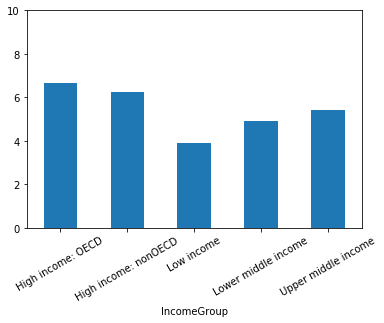

In [135]:
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10), legend=False)
plt.show()

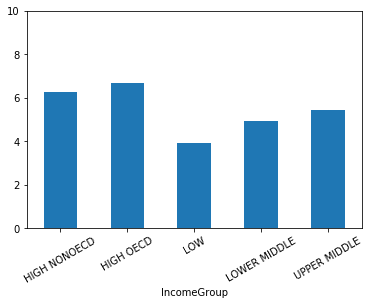

In [136]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10), legend=False)
plt.show()

## Working With Missing Data

### Introduction

In [137]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [138]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [139]:
shape_2015

(164, 13)

In [140]:
shape_2016

(164, 14)

In [141]:
shape_2017

(164, 13)

### Identifying Missing Values

In [142]:
missing = happiness2015['Happiness Score'].isnull()

In [143]:
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [144]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [145]:
happiness2016.isnull().sum()

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [146]:
happiness2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

### Correcting Data Cleaning Errors that Result in Missing Values

In [147]:
combined = pd.concat([happiness2015,happiness2016,happiness2017], ignore_index=True, sort=True)

In [148]:
combined.isnull().sum()

Country                          0  
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                           22 
Freedom                          22 
Generosity                       22 
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                             0  
dtype: int64

In [149]:
happiness2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [150]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ') \
                        .str.replace(r'\s+', ' ') \
                        .str.strip() \
                        .str.upper()

In [151]:
happiness2017.head(2)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [152]:
happiness2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [153]:
happiness2016.columns = happiness2016.columns.str.replace('.', ' ') \
                        .str.replace(r'[\(\)]', '') \
                        .str.strip() \
                        .str.upper()

In [154]:
happiness2016.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [155]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [156]:
happiness2015.columns = happiness2015.columns.str.replace('.', ' ') \
                        .str.replace(r'[\(\)]', '') \
                        .str.strip() \
                        .str.upper()

In [157]:
happiness2015.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [158]:
combined = pd.concat([happiness2015,happiness2016,happiness2017], ignore_index=True, sort=True)

In [159]:
combined.isnull().sum()

COUNTRY                        0  
DYSTOPIA RESIDUAL              22 
ECONOMY GDP PER CAPITA         22 
FAMILY                         22 
FREEDOM                        22 
GENEROSITY                     22 
HAPPINESS RANK                 22 
HAPPINESS SCORE                22 
HEALTH LIFE EXPECTANCY         22 
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION    22 
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                           0  
dtype: int64

### Visualizing Missing Data

In [160]:
import seaborn as sns

In [161]:
combined_updated = combined.set_index('YEAR')

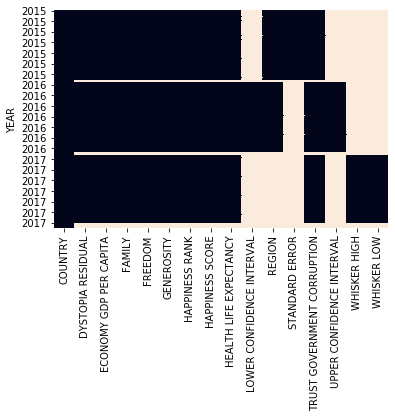

In [162]:
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [163]:
combined[combined['YEAR'] == 2017]['REGION'].isnull().sum()

164

### Using Data From Additional Sources to Fill in Missing Values

In [164]:
regions2015 = happiness2015[['COUNTRY', 'REGION']].copy()
regions2016 = happiness2016[['COUNTRY', 'REGION']].copy()


In [166]:
regions2015.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [167]:
regions = pd.concat([regions2015, regions2016], ignore_index=True)

In [168]:
regions.dropna(inplace=True)
regions.drop_duplicates(inplace=True)

In [170]:
regions.shape

(164, 2)

In [171]:
regions.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [172]:
combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015


In [173]:
combined = pd.merge(left=combined, 
                   right=regions,
                   on='COUNTRY',
                   how='left')

In [174]:
combined.head(3)

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION_x,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe


In [175]:
combined.isnull().sum()

COUNTRY                        0  
DYSTOPIA RESIDUAL              22 
ECONOMY GDP PER CAPITA         22 
FAMILY                         22 
FREEDOM                        22 
GENEROSITY                     22 
HAPPINESS RANK                 22 
HAPPINESS SCORE                22 
HEALTH LIFE EXPECTANCY         22 
LOWER CONFIDENCE INTERVAL      335
REGION_x                       177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION    22 
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                           0  
REGION_y                       0  
dtype: int64

In [176]:
combined.drop('REGION_x', axis=1, inplace=True)

In [177]:
combined.rename(columns={'REGION_y' : 'REGION'}, inplace=True)

In [178]:
combined.isnull().sum()

COUNTRY                        0  
DYSTOPIA RESIDUAL              22 
ECONOMY GDP PER CAPITA         22 
FAMILY                         22 
FREEDOM                        22 
GENEROSITY                     22 
HAPPINESS RANK                 22 
HAPPINESS SCORE                22 
HEALTH LIFE EXPECTANCY         22 
LOWER CONFIDENCE INTERVAL      335
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION    22 
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                           0  
REGION                         0  
dtype: int64

### Identifying Duplicates Values

In [179]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])

In [180]:
dups.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [181]:
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION


In [182]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()

In [183]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])

In [184]:
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Correcting Duplicates Values

In [185]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


In [186]:
combined.drop_duplicates(['COUNTRY', 'YEAR'], inplace=True)

In [187]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


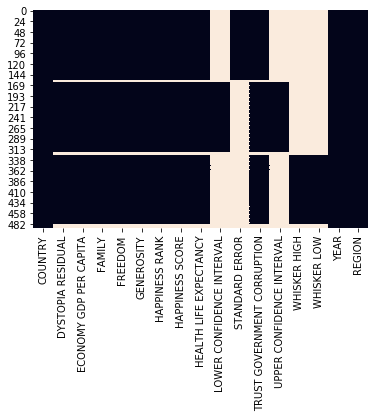

In [189]:
sns.heatmap(combined.isnull(), cbar=False)
plt.show()

### Handle Missing Values by Dropping Columns

In [191]:
combined.isnull().sum()

COUNTRY                        0  
DYSTOPIA RESIDUAL              19 
ECONOMY GDP PER CAPITA         19 
FAMILY                         19 
FREEDOM                        19 
GENEROSITY                     19 
HAPPINESS RANK                 19 
HAPPINESS SCORE                19 
HEALTH LIFE EXPECTANCY         19 
LOWER CONFIDENCE INTERVAL      332
STANDARD ERROR                 331
TRUST GOVERNMENT CORRUPTION    19 
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
YEAR                           0  
REGION                         0  
dtype: int64

In [192]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 
                   'WHISKER LOW']

In [193]:
combined_dropped = combined.drop(columns_to_drop, axis=1)

In [195]:
combined_dropped.isnull().sum()

COUNTRY                        0 
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                           0 
REGION                         0 
dtype: int64

    df.dropna(axis=1)

In [197]:
combined.notnull().sum().sort_values()

WHISKER LOW                    155
WHISKER HIGH                   155
LOWER CONFIDENCE INTERVAL      157
UPPER CONFIDENCE INTERVAL      157
STANDARD ERROR                 158
HEALTH LIFE EXPECTANCY         470
DYSTOPIA RESIDUAL              470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
FREEDOM                        470
GENEROSITY                     470
HAPPINESS RANK                 470
HAPPINESS SCORE                470
TRUST GOVERNMENT CORRUPTION    470
COUNTRY                        489
YEAR                           489
REGION                         489
dtype: int64

In [198]:
combined_dropped = combined.dropna(thresh=159, axis=1).copy()

In [199]:
combined_dropped.isnull().sum()

COUNTRY                        0 
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                           0 
REGION                         0 
dtype: int64

### Analyzing Missing Data

In [200]:
sorted_data = combined_dropped.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])

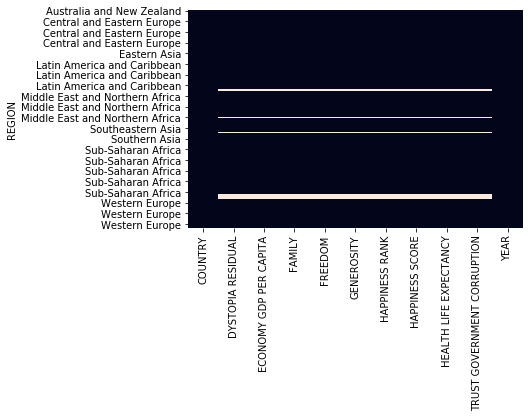

In [201]:
sns.heatmap(sorted_data.isnull(), cbar=False)
plt.show()

### Handling Missing Values with Imputation

In [202]:
happiness_mean = combined_dropped['HAPPINESS SCORE'].mean()

In [204]:
happiness_mean

5.370727659882893

In [205]:
combined_dropped['HAPPINESS SCORE UPDATED'] = combined_dropped['HAPPINESS SCORE'].fillna(happiness_mean)

In [207]:
combined_dropped['HAPPINESS SCORE UPDATED'].mean()

5.370727659882894

In [208]:
combined_dropped.pivot_table(index='REGION',
                            values='HAPPINESS SCORE',
                            margins=True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


### Dropping Rows

In [209]:
combined_dropped = combined_dropped.dropna()

In [211]:
combined_dropped.isnull().sum()

COUNTRY                        0
DYSTOPIA RESIDUAL              0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
FREEDOM                        0
GENEROSITY                     0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
HEALTH LIFE EXPECTANCY         0
TRUST GOVERNMENT CORRUPTION    0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64

## Identifying Hidden Missing Data

### Primer: Happiness 2015

In [214]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv')

In [215]:
happiness2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [216]:
h_2015 = happiness2015['Region'].unique()

In [217]:
np.sort(h_2015)

array(['.', 'Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

In [218]:
happiness2015[happiness2015['Region'] == '.']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,.,?,.,.,.,.,.,.,.,.,.,2015
159,Namibia,.,?,.,.,.,.,.,.,.,.,.,2015
160,Puerto Rico,.,?,.,.,.,.,.,.,.,.,.,2015
161,Somalia,.,?,.,.,.,.,.,.,.,.,.,2015
162,Somaliland Region,.,?,.,.,.,.,.,.,.,.,.,2015
163,South Sudan,.,?,.,.,.,.,.,.,.,.,.,2015


In [219]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv', na_values='.')

In [221]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   0
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [222]:
happiness2015[happiness2015['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [223]:
happiness2015.replace('?', np.nan, inplace=True)

In [224]:
happiness2015[happiness2015['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


### Primer: Diabetes

In [84]:
diabetes = pd.read_csv('data/pima-indians-diabetes_data.csv')

In [225]:
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [226]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [227]:
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [228]:
diabetes.loc[diabetes['BMI'] == 0, 'BMI'] = np.nan

In [229]:
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Analyzing missingness percentage

In [231]:
missing_values_sum = diabetes.isnull().sum()

In [232]:
missing_values_sum/diabetes.shape[0] * 100

Pregnant             0.000000 
Glucose              0.651042 
Diastolic_BP         4.557292 
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                  1.432292 
Diabetes_Pedigree    0.000000 
Age                  0.000000 
Class                0.000000 
dtype: float64

## Andvance Visualization of Missing Data

In [233]:
! pip install missingno

In [ ]:
# conda install -c conda-forge missingno    moramo iz terminala namestiti

In [234]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

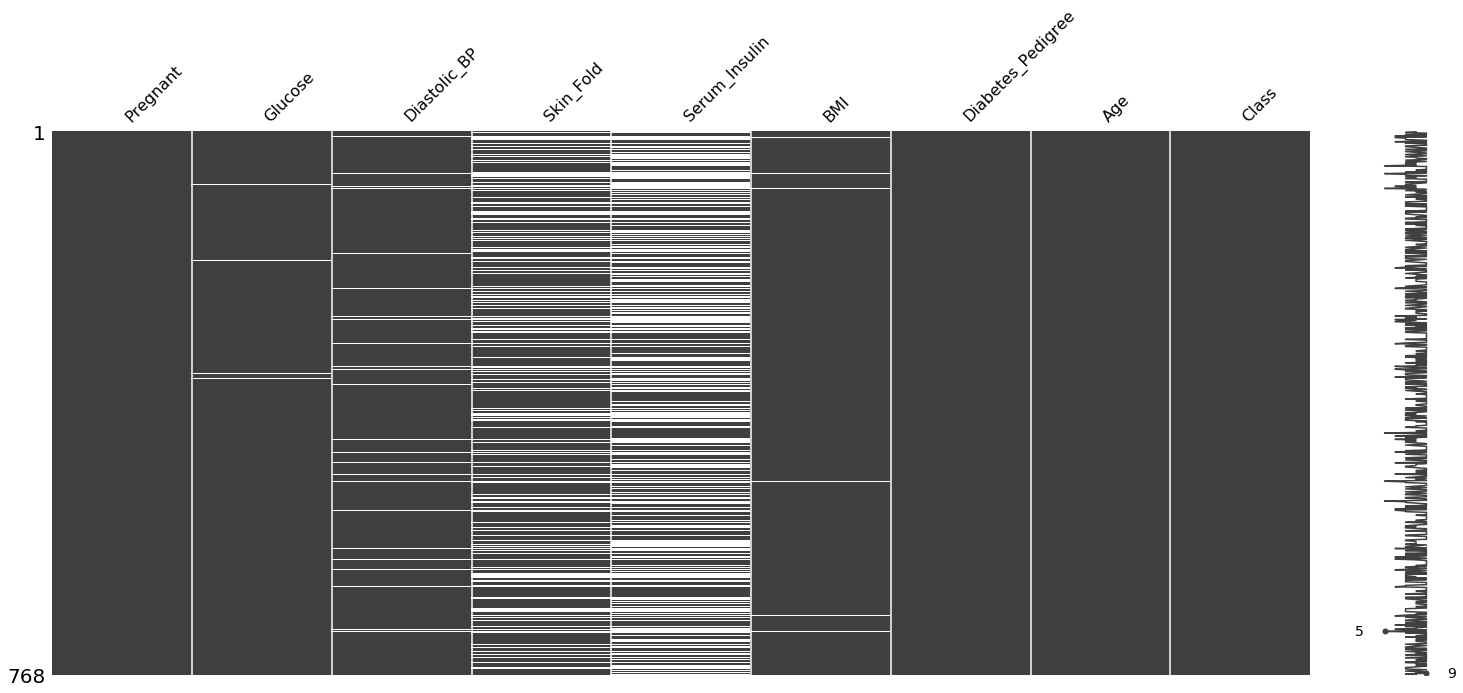

In [236]:
msno.matrix(diabetes)
plt.show()

### Missingness Patterns

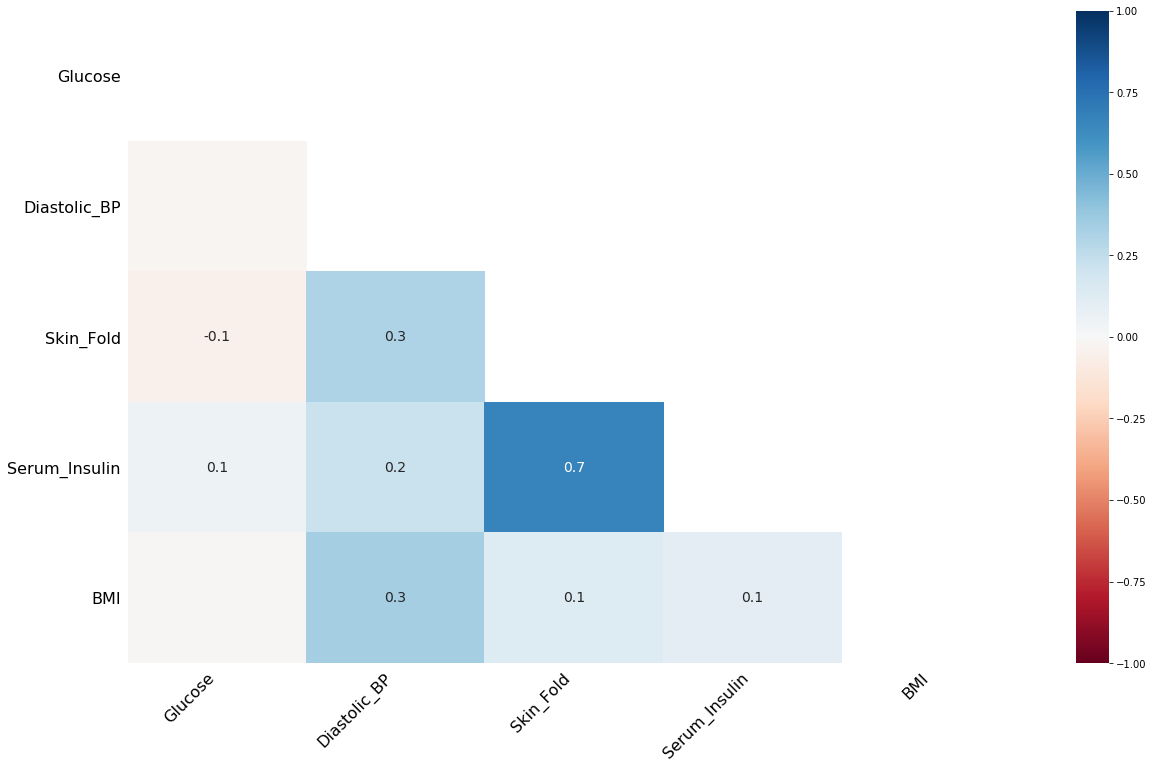

In [237]:
msno.heatmap(diabetes)
plt.show()

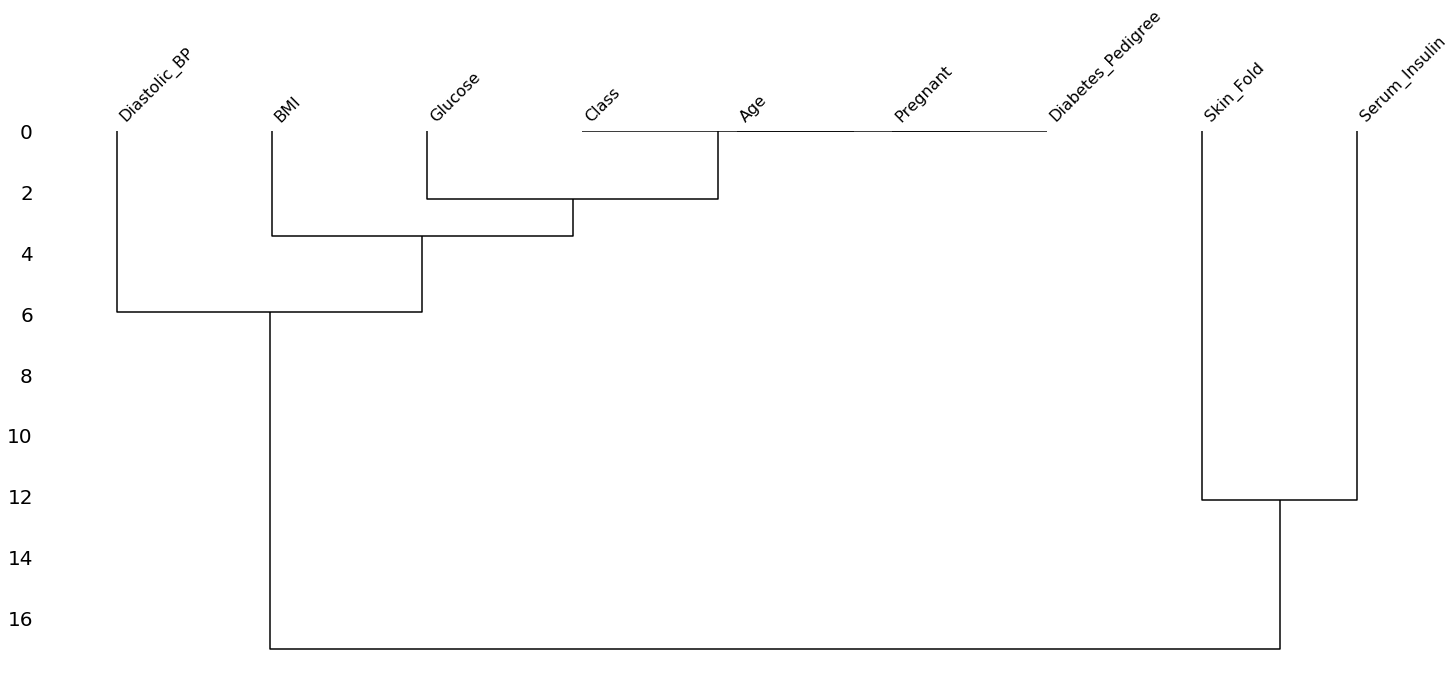

In [239]:
msno.dendrogram(diabetes)
plt.show()

In [241]:
sorted_values = diabetes.sort_values('Serum_Insulin')

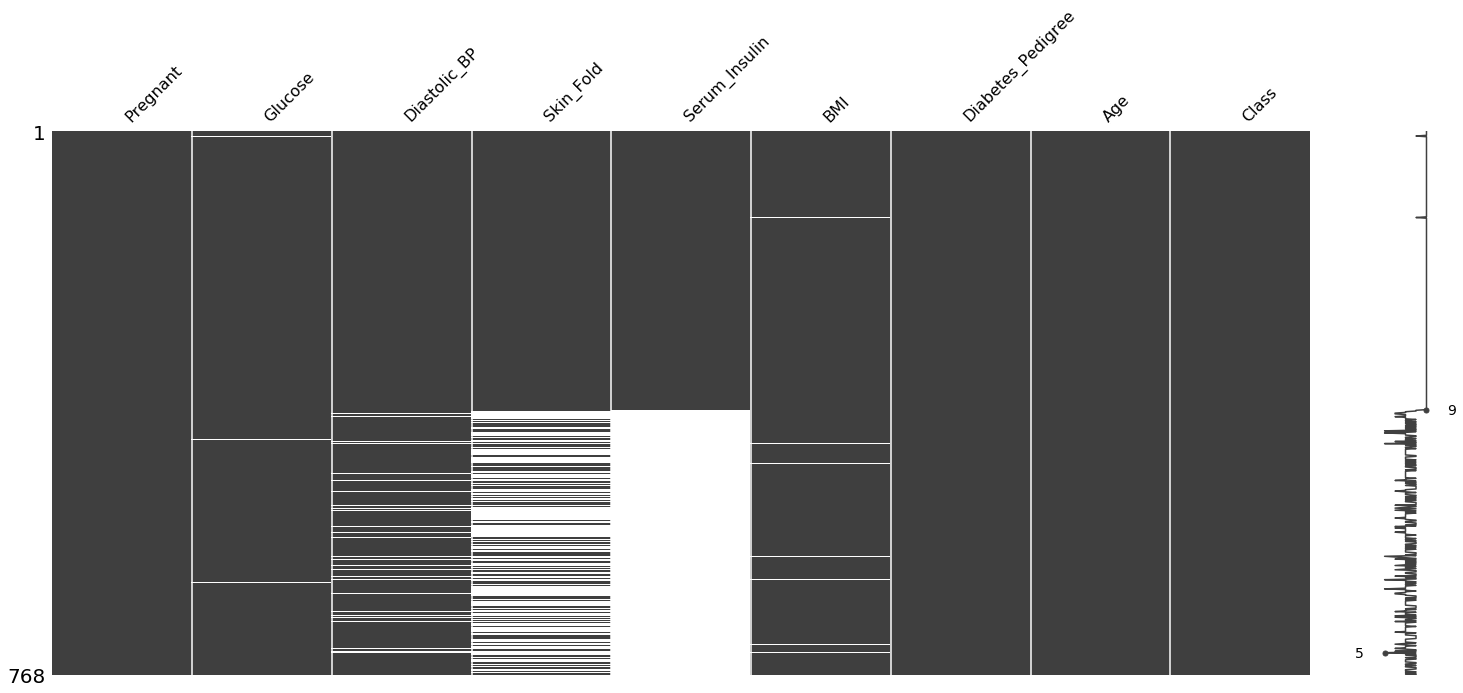

In [243]:
msno.matrix(sorted_values)
plt.show()

## Handle Missing Values

### Dropping Rows

In [244]:
diabetes['Glucose'].isnull().sum()

5

In [245]:
diabetes.dropna(subset=['Glucose'], how='all', inplace=True)

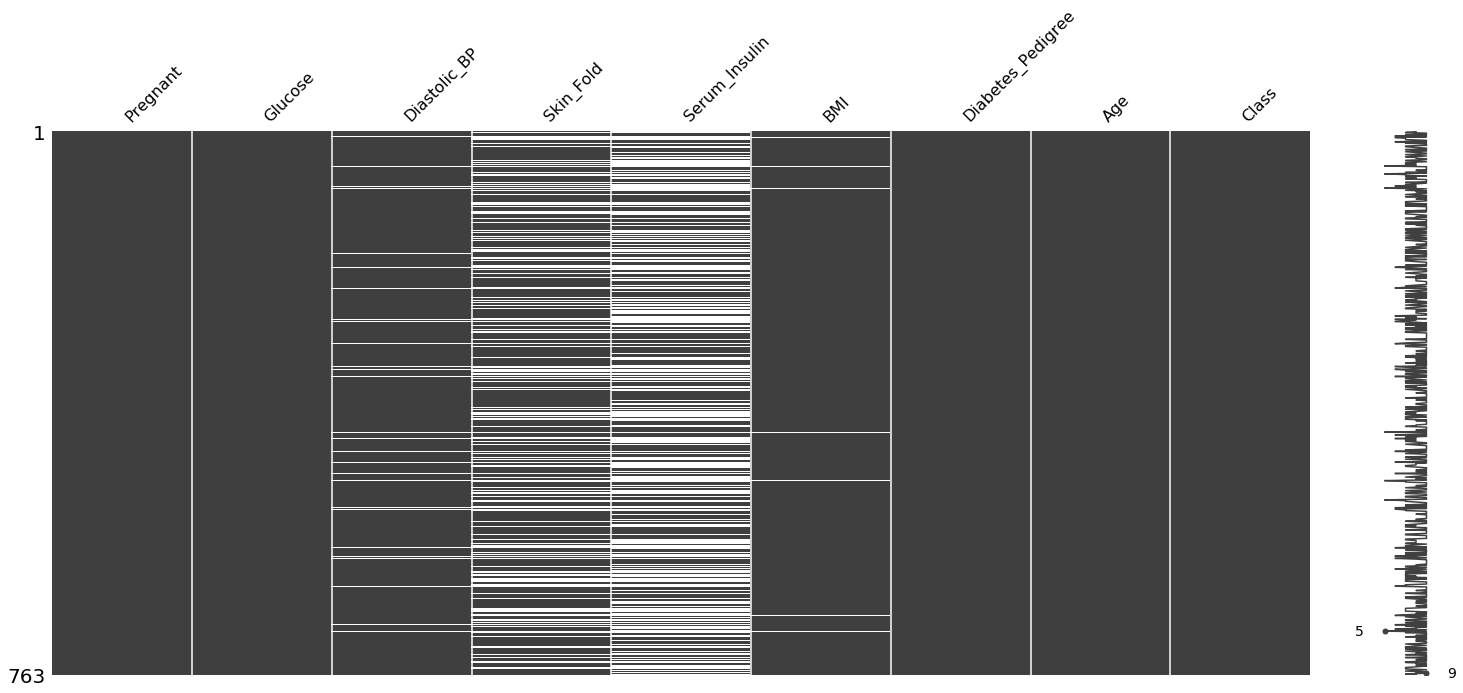

In [246]:
msno.matrix(diabetes)
plt.show()

### Imputation Techniques

#### Mean & median imputation


In [247]:
from sklearn.impute import SimpleImputer

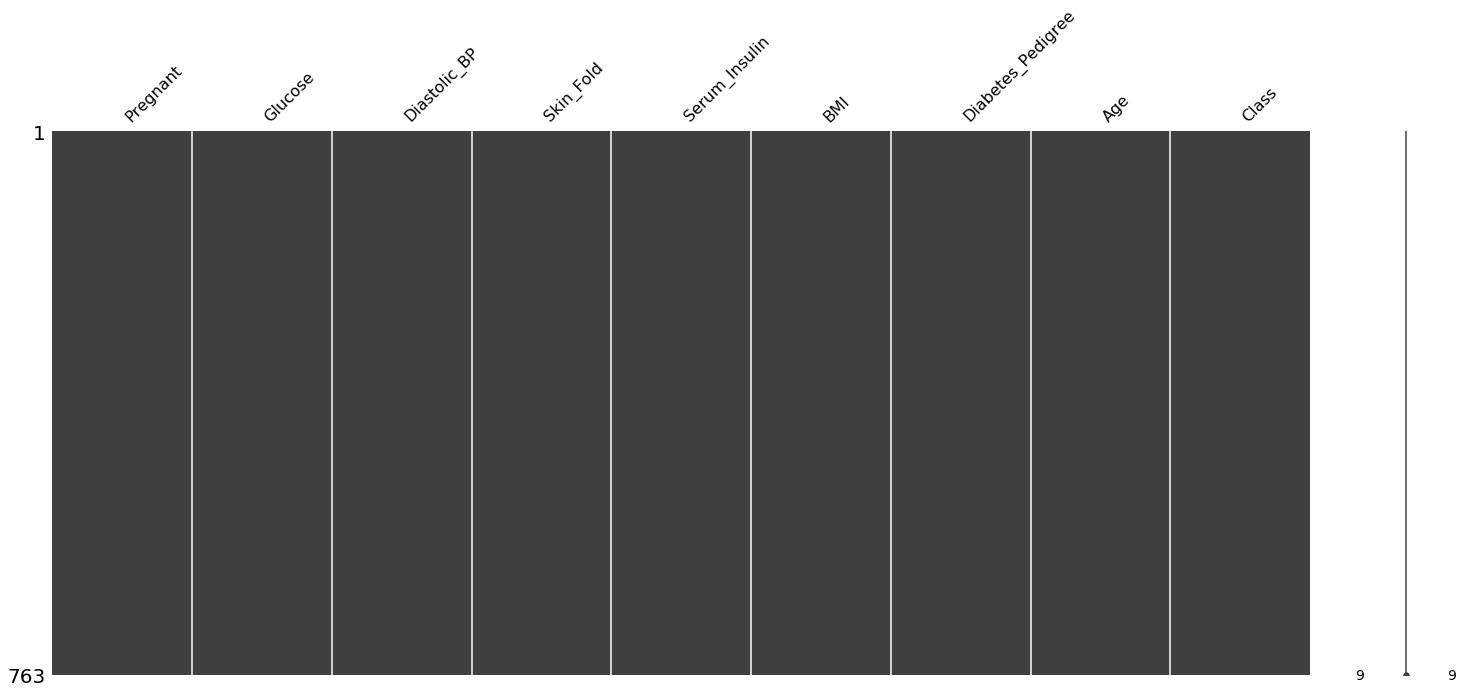

In [250]:
diabetes_mean = diabetes.copy(deep=True)

mean_imputer = SimpleImputer(strategy='mean')

diabetes_mean.iloc[:,:] = mean_imputer.fit_transform(diabetes_mean)

msno.matrix(diabetes_mean)
plt.show()

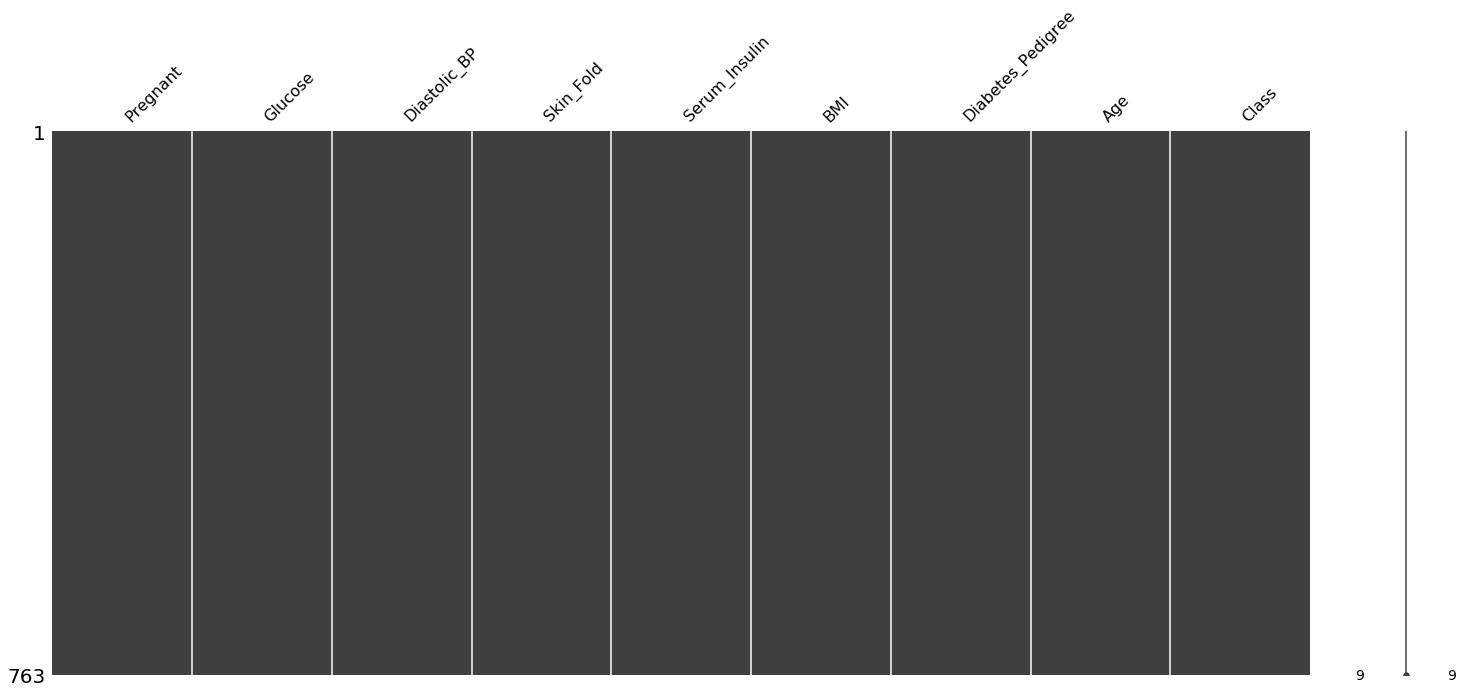

In [251]:
diabetes_median = diabetes.copy(deep=True)

median_imputer = SimpleImputer(strategy='median')

diabetes_median.iloc[:,:] = median_imputer.fit_transform(diabetes_median)

msno.matrix(diabetes_median)
plt.show()

#### Mode and constant imputation

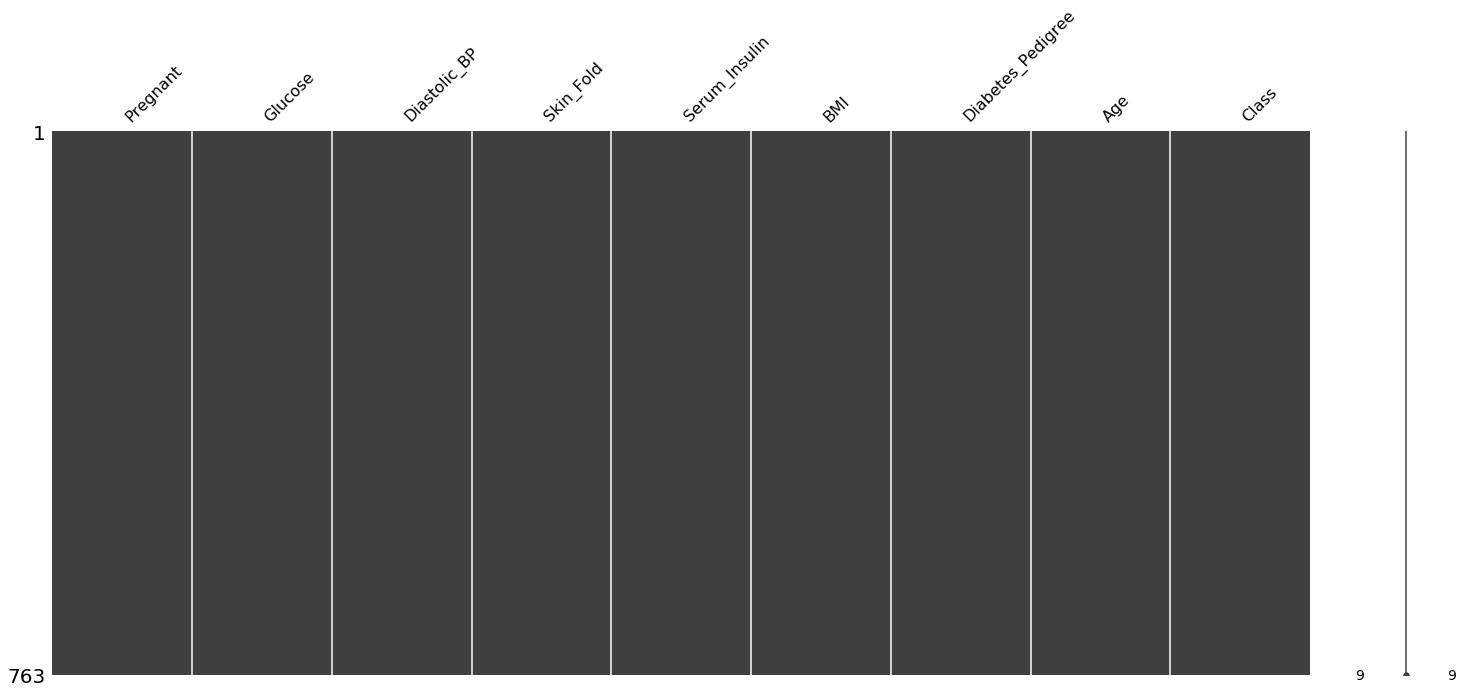

In [252]:
diabetes_mode = diabetes.copy(deep=True)

mode_imputer = SimpleImputer(strategy='most_frequent')

diabetes_mode.iloc[:,:] = mode_imputer.fit_transform(diabetes_mode)

msno.matrix(diabetes_mode)
plt.show()

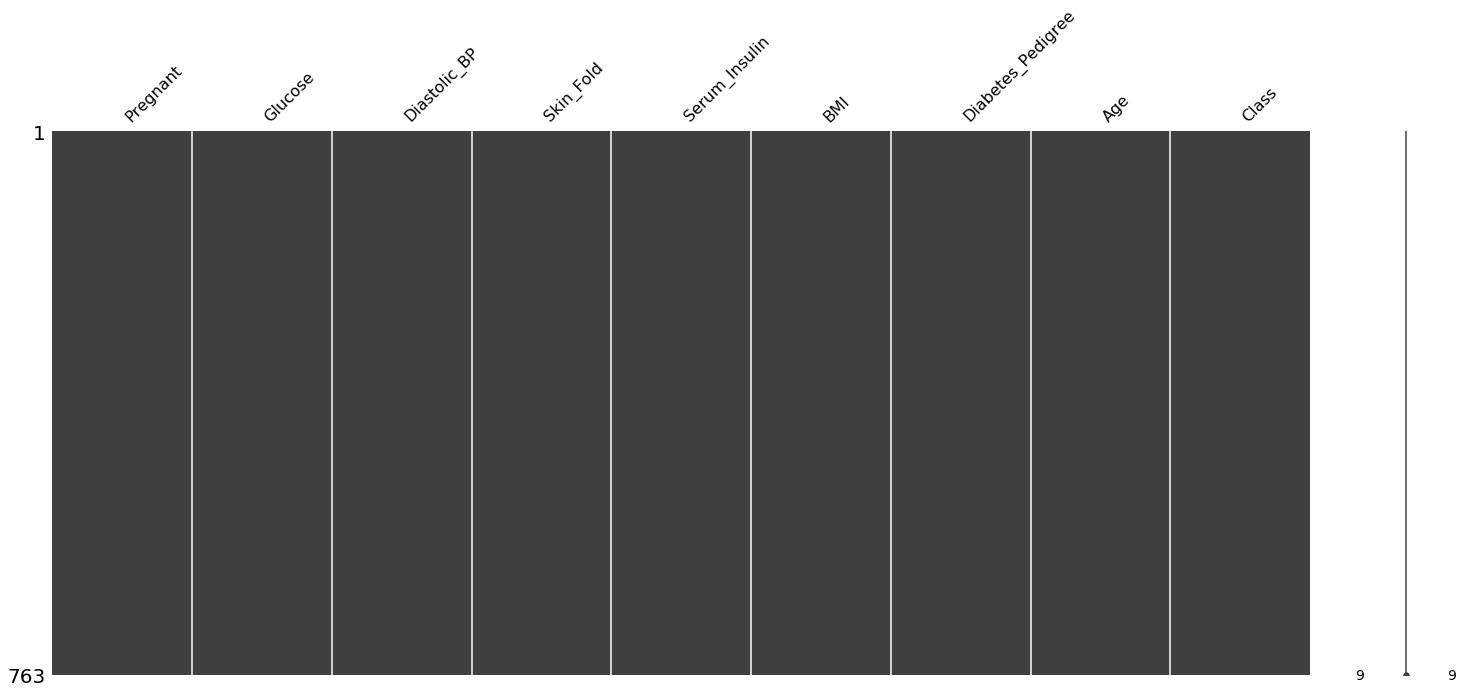

In [253]:
diabetes_constant = diabetes.copy(deep=True)

constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

diabetes_constant.iloc[:,:] = constant_imputer.fit_transform(diabetes_constant)

msno.matrix(diabetes_constant)
plt.show()

#### Visualize imputations

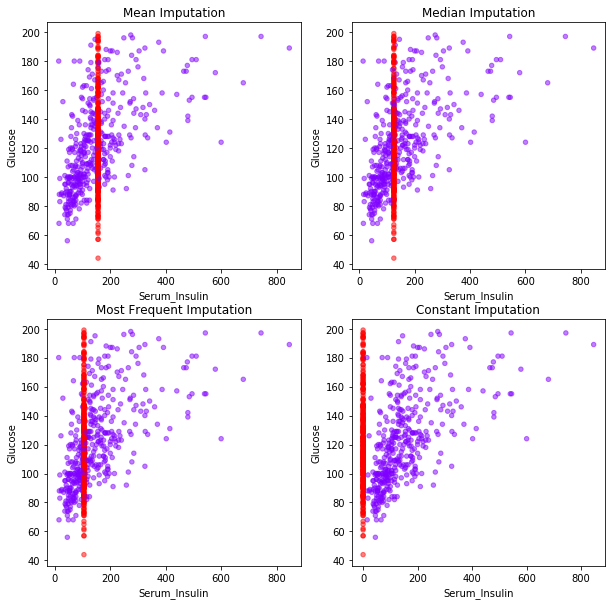

In [254]:
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10,10))

nullity = diabetes['Serum_Insulin'].isnull() | diabetes['Glucose'].isnull()


imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Serum_Insulin',
                            y='Glucose',
                            kind='scatter',
                            alpha=0.5,
                            c=nullity, 
                            cmap='rainbow',
                            ax=ax,
                            colorbar=False,
                            title=df_key)
plt.show()